In [2]:
from sklearn.datasets import fetch_olivetti_faces

dataset = fetch_olivetti_faces()

In [3]:
print(dataset.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

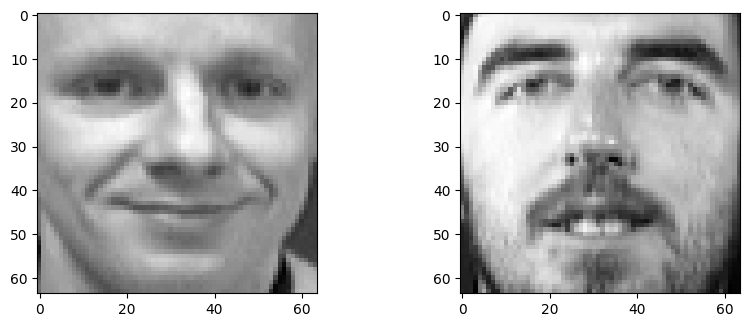

In [5]:
plt.figure(1,figsize=(10,8))
plt.axis('off')
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot = top left
plt.imshow(dataset.data[200].reshape(64,-1),cmap=matplotlib.cm.gray)
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 1st subplot = top left
plt.imshow(dataset.data[100].reshape(64,-1),cmap=matplotlib.cm.gray)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(dataset.data, dataset.target, test_size=0.1, stratify=dataset.target)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, random_state=42)

In [19]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_PCA = pca.fit_transform(X_train)
X_val_PCA = pca.transform(X_val)
X_test_PCA = pca.transform(X_test)

In [20]:
from sklearn.cluster import KMeans

kmeans_per_k = []
clusters_range = range(5,150,5)

for k in clusters_range:
	print(k)
	kmeans = KMeans(n_clusters=k,random_state=42)
	kmeans.fit(X_train_PCA)
	kmeans_per_k.append(kmeans)

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145


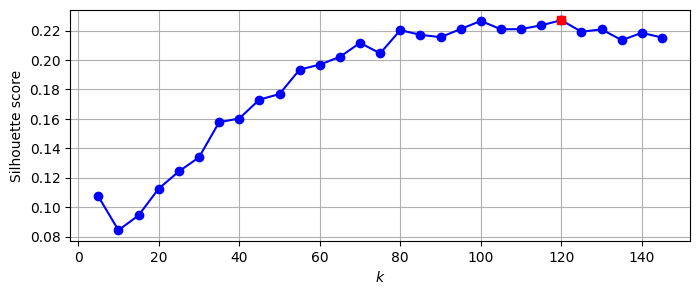

In [25]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_PCA, kmeans.labels_) for kmeans in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_score = silhouette_scores[best_index]
best_score_k = clusters_range[best_index]
plt.figure(111,figsize=(8,3))
plt.plot(clusters_range,silhouette_scores,'bo-')
plt.xlabel('$k$')
plt.ylabel('Silhouette score')
plt.plot(best_score_k,best_score,'rs')
plt.grid()
plt.show()


In [26]:
best_model = kmeans_per_k[best_index]